<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
</div>
</a>

# Practicum Convolution Neural Nets (CNN) Deel 2

**Doel: Toepassen Convolutional Neural Networks**

### Imports

In [295]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

import torch
import random


<h3>Globale variabelen</h3>

In [296]:
forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'

### Context

<p>
Dit practicum bestaat uit twee onderdelen
<ol>
    <li>Het toepassen van een convolutie en pooling filter</li>
    <li><b>Het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden.</b></li>
</ol>    
Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset
</p>

<img src='../../pics/eurosat_cnn.png' length=65% width=65%>

<h3>Data Collection</h3>
<p>
We gebruiken Images uit de <a href="https://github.com/phelber/EuroSAT">EuroSat dataset</a> die gemaakt zijn met de Sentinel-2 sateliet. Elke image is een 64x64 pixels foto van Europees aardoppervlak op een hoogte van 10 meter. De images zijn te categoriseren in Highway, Industrial, Pasture, PermanentCrop, Residential, River en SeaLake.
</p>
<img src=../../pics/eurosat_overview_small.jpg length=40% width=40%>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

## Opdrachten

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [297]:
# Eerst de afbeeldingen weer inladen
industrial = torchvision.io.read_image(f'{industrialDirectory}/Industrial_1.jpg', ImageReadMode.GRAY).float() / 255

i=random.randint(0,2500)
forest = torchvision.io.read_image(f'{forestDirectory}/Forest_{i}.jpg', ImageReadMode.GRAY).float() / 255

forest1 = torchvision.io.read_image(f'{forestDirectory}/Forest_1.jpg', ImageReadMode.GRAY).float() / 255


print(industrial.shape)
print(forest.shape)

torch.Size([1, 64, 64])
torch.Size([1, 64, 64])


In [298]:
# a. Bekijk de pooling opties en kies de juiste avg-variant
# https://pytorch.org/docs/stable/nn.functional.html
# https://pytorch.org/docs/stable/generated/torch.nn.functional.avg_pool2d.html#torch.nn.functional.avg_pool2d

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':

#    - Kies een 3x3 kernel en een stride van 1
industrialPooled = torch.nn.functional.avg_pool2d(industrial, kernel_size=3, stride=1)
print(industrialPooled.shape)

# c. Herhaal de bovenstaande stappen voor een willekeure Forest Image
forestPooled = torch.nn.functional.avg_pool2d(forest, kernel_size=3, stride=1)
print(forestPooled.shape)

torch.Size([1, 62, 62])
torch.Size([1, 62, 62])


In [299]:
# alternatief: er is ook torch.nn.AvgPool2d maar met andere parameters en dan werkt bovenstaande code niet.

### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

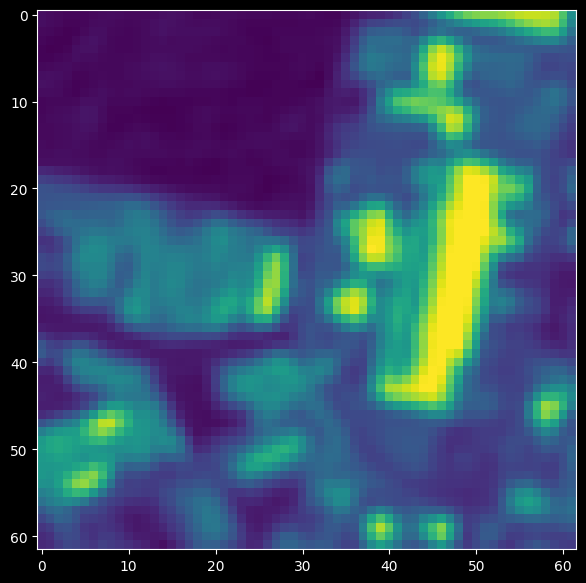

In [300]:
plt.imshow(industrialPooled.permute(1, 2, 0));

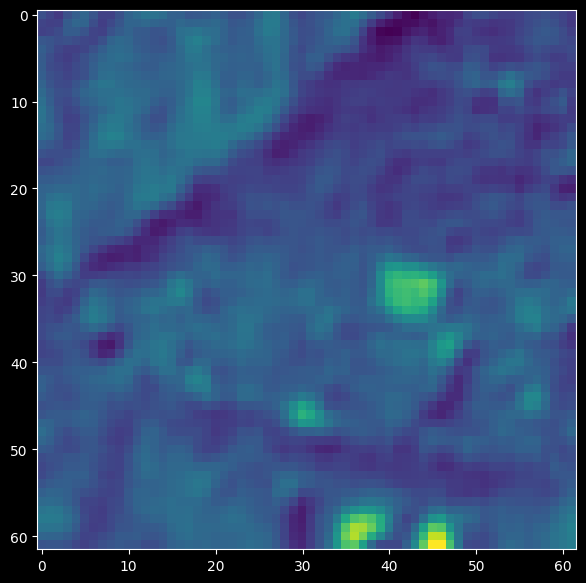

In [301]:
plt.imshow(forestPooled.permute(1, 2, 0));

In [302]:
# Extra: varieer de stride en de kernel

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

In [303]:
# a. Bedenk en maak zelf een 2d convolution filter
# met 2,0,-2 maak je er een Sobel kernel van
edgeFilter3 = torch.Tensor(
        [
            [1, 0, -1], 
            [3, 0, -3], 
            [1, 0, -1]
        ]
).unsqueeze(0).unsqueeze(0)

# dit kan je weglaten, dan pakt torch de deafult en die is random

In [304]:
# b. Bedenk en maak zelf een 2d pooling filter
industrialPooled5 = torch.nn.functional.avg_pool2d(industrial, kernel_size=5, stride=2)
print(industrialPooled5.shape)

forestPooled5 = torch.nn.functional.avg_pool2d(forest1, kernel_size=5, stride=2)
print(industrialPooled5.shape)

torch.Size([1, 30, 30])
torch.Size([1, 30, 30])


In [305]:
# c. Pas nu de convolutie toe op 'Industrial_1.jpg'
edgeFilter3.requires_grad = True

edgeConv3 = torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0) 

with torch.no_grad():
    edgeConv3.weight = nn.Parameter(edgeFilter3)
    
industrialFiltered3 = edgeConv3(industrial)
forestFiltered3 = edgeConv3(forest1)


In [306]:
# alternatief: gebruik torch.nn.functional.conv2d
# geeft een foutmelding want verwacht andere parameters

# Wat is het verschil tussen nn.Method() en nn.functional.method() ???

# torch.nn.Conv2d: je maakt een klasse aan en doet daar nog niets mee

# torch.nn.functional.conv2d is een functie en daar doe je meteen iets mee


In [307]:
# d. Pas vervolgens een pooling toe op de uitkomst van c.
industrialPooled5 = torch.nn.functional.avg_pool2d(industrialFiltered3, kernel_size=5, stride=2)
print(industrialPooled5.shape)

forestPooled5 = torch.nn.functional.avg_pool2d(forestFiltered3, kernel_size=5, stride=2)
print(industrialPooled5.shape)

torch.Size([1, 29, 29])
torch.Size([1, 29, 29])


In [308]:
# e. Doe hetzelfde voor de afbeelding 'Forest_1.jpg'
# zie boven

In [309]:
# Function for plotting the images
def plotImgs(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (10, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    
    imL = axL.imshow(np.squeeze(lImg))
    imR = axR.imshow(np.squeeze(rImg))

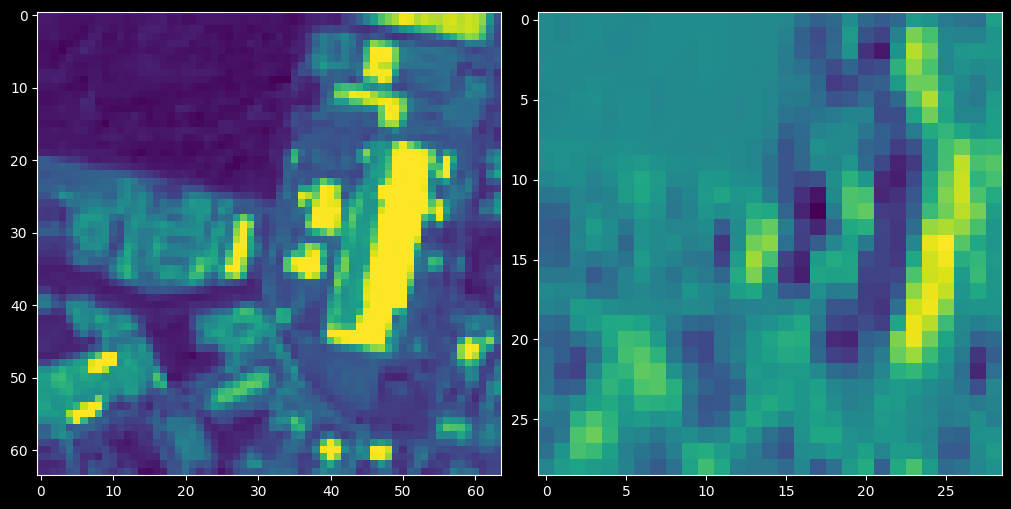

In [310]:
# Squeeze and detach to plot image.
industrialPooled5_1 = torch.Tensor.detach(industrialPooled5)
plotImgs(industrial, industrialPooled5_1)

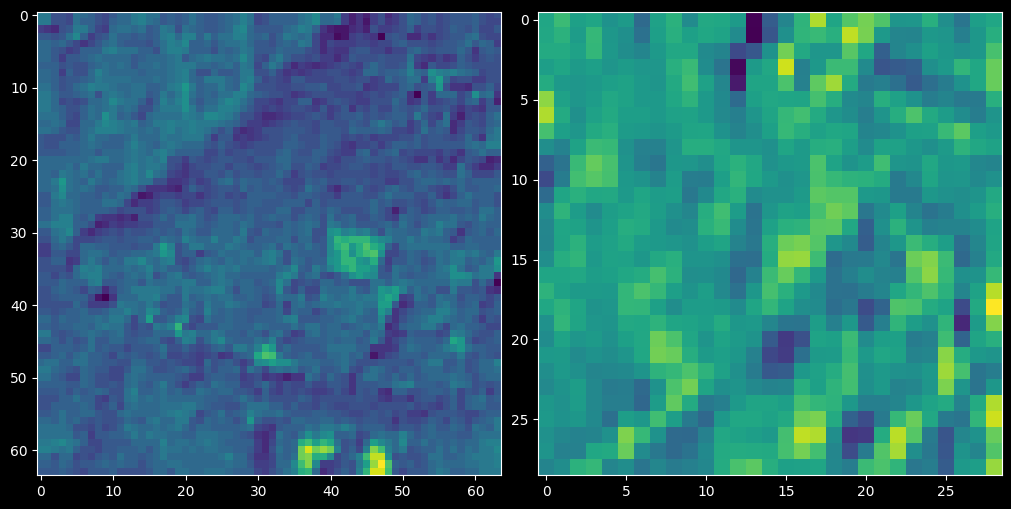

In [311]:
# Squeeze and detach to plot image.
forestPooled5_1 = torch.Tensor.detach(forestPooled5)
plotImgs(forest, forestPooled5_1)

### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

In [312]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

industrialFiltered3_2 = edgeConv3(industrialPooled5)
forestFiltered3_2 = edgeConv3(forestPooled5)

industrialPooled5_2 = torch.nn.functional.avg_pool2d(industrialFiltered3_2, kernel_size=5, stride=2)
print(industrialPooled5_2.shape)

forestPooled5_2 = torch.nn.functional.avg_pool2d(forestFiltered3_2, kernel_size=5, stride=2)
print(industrialPooled5_2.shape)

torch.Size([1, 12, 12])
torch.Size([1, 12, 12])


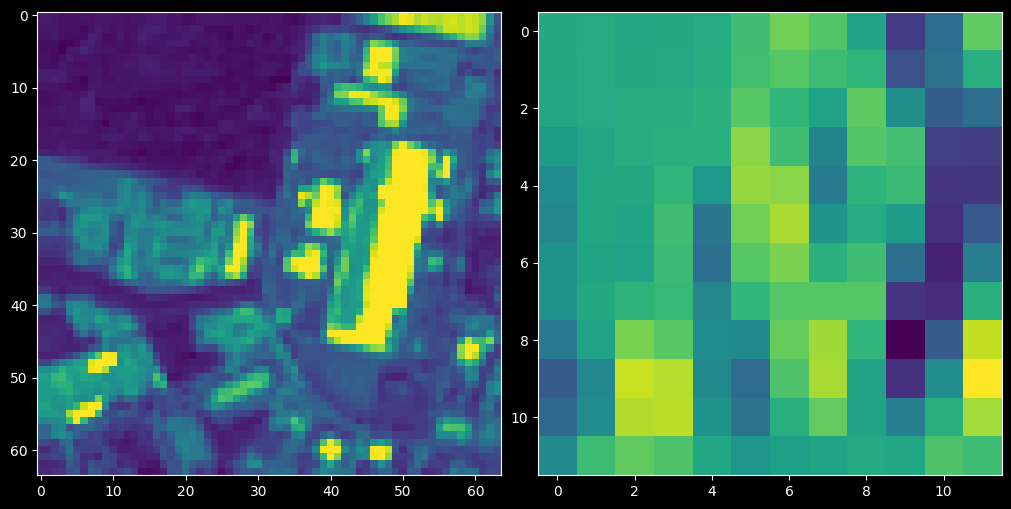

In [313]:
industrialPooled5_2 = torch.Tensor.detach(industrialPooled5_2)
plotImgs(industrial, industrialPooled5_2)

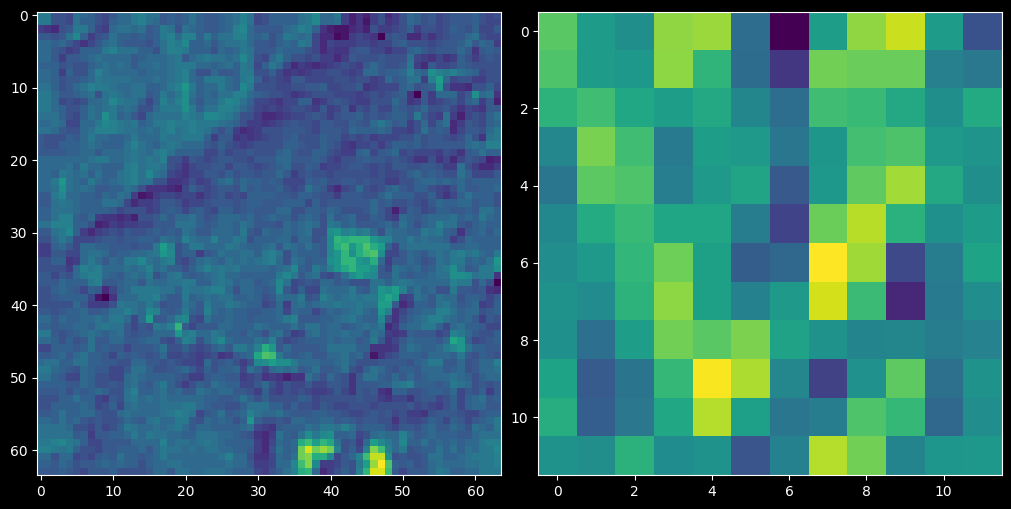

In [314]:
forestPooled5_2 = torch.Tensor.detach(forestPooled5_2)
plotImgs(forest, forestPooled5_2)

### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [315]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels? 
# output, klasses 0 en 1

#    - Hoe representeerden we de kruisjes en de rondjes? 
# input, features

#    - Hoe combineerden we dit tot een dataset? 
# lijst van inputs en lijst van outputs

# b. Hoe kunnen we de labels 'Industrial' en 'Forest' dus representeren?
# Industrial -> 0
# Forest -> 1



In [316]:
# c. Vorm nu een dataset voor 'Industrial' en 'Forest'


In [317]:
import os

In [318]:

listOfTensors = []
outputLabels = []

for filename in os.listdir(industrialDirectory):
    imgFile = os.path.join(industrialDirectory, filename)

    if ".jpg" in imgFile:
    
        listOfTensors.append(torchvision.io.read_image(imgFile, mode=ImageReadMode.UNCHANGED).to(torch.float32)/255)
        outputLabels.append(torch.Tensor([0,1]))
        
for filename in os.listdir(forestDirectory):
    imgFile = os.path.join(forestDirectory, filename)

    if ".jpg" in imgFile:
       
        listOfTensors.append(torchvision.io.read_image(imgFile, mode=ImageReadMode.UNCHANGED).to(torch.float32)/255)
        outputLabels.append(torch.Tensor([0,1]))
        

In [319]:
print(outputLabels[0])

tensor([0., 1.])


In [320]:
display(len(listOfTensors))

display(len(outputLabels))

display(outputLabels[4000])

display(listOfTensors[0])

5500

5500

tensor([0., 1.])

tensor([[[0.1804, 0.1882, 0.1882,  ..., 0.8745, 0.6196, 0.4000],
         [0.1765, 0.1882, 0.1882,  ..., 0.8863, 0.6196, 0.4000],
         [0.1725, 0.1765, 0.1843,  ..., 0.8471, 0.5529, 0.3843],
         ...,
         [0.3333, 0.3373, 0.3725,  ..., 0.3490, 0.3686, 0.3725],
         [0.2588, 0.2588, 0.2784,  ..., 0.3137, 0.3490, 0.3647],
         [0.2588, 0.2588, 0.2863,  ..., 0.3333, 0.3569, 0.3608]],

        [[0.3137, 0.3098, 0.3020,  ..., 0.8667, 0.6118, 0.4039],
         [0.3176, 0.3098, 0.3020,  ..., 0.8627, 0.6118, 0.4078],
         [0.3137, 0.3098, 0.3059,  ..., 0.8078, 0.5490, 0.4000],
         ...,
         [0.3647, 0.3647, 0.3843,  ..., 0.3843, 0.3961, 0.3804],
         [0.3176, 0.3176, 0.3176,  ..., 0.3569, 0.3843, 0.3804],
         [0.3373, 0.3333, 0.3412,  ..., 0.3647, 0.3922, 0.3843]],

        [[0.3098, 0.3176, 0.3176,  ..., 0.8784, 0.6627, 0.4745],
         [0.3098, 0.3176, 0.3176,  ..., 0.8784, 0.6549, 0.4667],
         [0.3059, 0.3137, 0.3137,  ..., 0.8392, 0.5804, 0.

In [323]:
full_dataset = []
for i in range(len(listOfTensors)):
   full_dataset.append([listOfTensors[i], outputLabels[i]])

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)
i1, l1 = next(iter(trainloader))
print(i1.shape)
# imageTensors.shape

testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=32)
i2, l2 = next(iter(trainloader))
print(i2.shape)
# imageTensors.shape

print(train_dataset[0][0])

torch.Size([32, 3, 64, 64])
torch.Size([32, 3, 64, 64])
tensor([[[0.2157, 0.2196, 0.2118,  ..., 0.3961, 0.5020, 0.6235],
         [0.2196, 0.2196, 0.2118,  ..., 0.4039, 0.5020, 0.6157],
         [0.2196, 0.2118, 0.2118,  ..., 0.3686, 0.4549, 0.5529],
         ...,
         [0.3961, 0.3843, 0.3569,  ..., 0.3176, 0.2980, 0.2980],
         [0.3961, 0.4000, 0.4471,  ..., 0.3020, 0.2941, 0.2980],
         [0.4039, 0.4196, 0.5569,  ..., 0.2902, 0.3059, 0.3098]],

        [[0.3216, 0.3176, 0.3098,  ..., 0.4275, 0.4863, 0.5686],
         [0.3176, 0.3176, 0.3098,  ..., 0.4235, 0.4824, 0.5686],
         [0.3059, 0.3098, 0.3098,  ..., 0.3961, 0.4510, 0.5176],
         ...,
         [0.4118, 0.4196, 0.4078,  ..., 0.3882, 0.3686, 0.3686],
         [0.4353, 0.4353, 0.4824,  ..., 0.3725, 0.3647, 0.3608],
         [0.4431, 0.4353, 0.5451,  ..., 0.3608, 0.3686, 0.3647]],

        [[0.3882, 0.3961, 0.3961,  ..., 0.4392, 0.4902, 0.5647],
         [0.4039, 0.4039, 0.3961,  ..., 0.4471, 0.4980, 0.5686],
  

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [328]:
# om relu aan te kunnen roepen moet bovenaan het notebook as F aangepast worden in as TF
# hier vervolgens F toevoegen om F.relu te kunnen gebruiken

from torch.nn import functional as F

In [329]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    # Hier worden de klasses aangemaakt en dus uit nn en niet uit nn.functional
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        # met 3 input kanalen en 6 output kanalen (zelf gekozen) en een kernel van 5 (dat is 3,5,5)
        # 6 varianten zijn geen kleuren meer maar feature maps met C,H,W = 6x60x60 want 65-5+1 (-kernel size +1)
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        # met grootte van 2 en stride van 2 dus je halveert 
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Hieronder begint de classificatie:
        # Fully connected layer matched on output of conv2 layer
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(16 * 13 * 13, 120) # waarbij 120 zelf gekozen
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84) # waarbij 120 gelijk aan de vorige laag en 84 zelf gekozen
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2) # warbij 84 gelijk aan de vorige laag en 2 je label klasses 0 en 1 zijn.
        
        # let op dat je 13 x 13 die erin gaat meer zegt dan je origineel van 64 x 64 omdat je er eigenschappen uit gefilterd hebt die iets zeggen
        
        # merk op dat het in alle lagen fully connected kan maar dat is heel veel rekenwerk en ws niet zo nauwkeurig
        
    #-------------------------------------------------------
    # Hier worden de klasses aangeroepen met x = C * H * W = 3,64,64    
    def forward(self, x):
        
        # Convolution with relu layers
        # van binnen naar buiten doe je convolutie, relu en pooling 
       
        x = self.pool(F.relu(self.conv1(x)))
         # na conv is het 6,60,60
        # na pooling is het 6,30,30
        
        x = self.pool(F.relu(self.conv2(x)))
        # na conv is het 16,26,26
        # na pooling 16,13,13 en dit is de representatie gemaakt door je encoder
        
        # vanaf hier is het fully connected en dit deel is je classifier:
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        # x = x.view(-1, 16 * 5 * 5)
        x = x.view(-1, 16 * 13 * 13)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return F.softmax(self.fc3(x), dim=1) # geeft de ruwe activatie (2 getallen) en dat kan je in een % uitdrukken dmv softmax: die geeft twee getallen tussen 0 en 1 en die samen 1 geven. Gebruik BCE Loss: BinaryCrossEntropy() met als result bijvoorbeeld 0.7 voor 0 en 0.3 voor 1 

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

- data prepareren en invoeren (dataset en dataloader)
- forward propagation
- evaluate: compare outcome with labels
- calculate loss and use it for back propagation (adjusting the weights)
- forward propagation etc.
- number of epochs until finsihed

Then:
- test with test data


# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

In [330]:
# een goed voorbeeld kan hier gevonden worden:
# https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/

In [331]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, default_collate

In [332]:
model = CNN()

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
from torchsummary import summary
summary(model.to(device), input_size=(3,64,64))



cpu
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            456
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            2,416
├─Linear: 1-4                            324,600
├─Linear: 1-5                            10,164
├─Linear: 1-6                            170
Total params: 337,806
Trainable params: 337,806
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            456
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            2,416
├─Linear: 1-4                            324,600
├─Linear: 1-5                            10,164
├─Linear: 1-6                            170
Total params: 337,806
Trainable params: 337,806
Non-trainable params: 0

In [333]:
for X_batch, y_batch in trainloader:
    # print(X_batch[0])
    # print(y_batch[0])
    pass

# x = model(train_dataset[0][0])

x = model(torch.Tensor(train_dataset[0][0]))

print(x)
print(train_dataset[0][1])

print(x - train_dataset[0][1])

tensor([[0.5155, 0.4845]], grad_fn=<SoftmaxBackward0>)
tensor([0., 1.])
tensor([[ 0.5155, -0.5155]], grad_fn=<SubBackward0>)


In [334]:
# Train the model
n_epochs = 3                                                # epochs
totalLoss = [] # for viz purposes
loss_fn = nn.BCELoss()                                         # Loss function
optimizer = optim.SGD(model.parameters(), lr=0.001)             #optimizer          #Learnrate
model.train() # wat doet deze functie? zet model in train modus

for epoch in range(n_epochs):
    print(epoch)
    losses = []
    loss_values = []
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss_values.append(loss.item()) # for viz purposes
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    totalLoss.append(sum(losses)/len(trainloader))
    # acc = (y_pred.round() == y_batch).float().mean()
    acc = (y_pred.round() == y_batch).float().mean()
    acc = float(acc)
    print("Model accuracy: %.2f%%" % (acc*100))
        
 
    # create one test tensor from the testset
    X_test, y_test = default_collate(test_dataset)
    model.eval()
    y_pred = model(X_test)
    print(y_pred)
    acc = (y_pred.round() == y_test).float().mean()
    acc = float(acc)
    print("Model accuracy: %.2f%%" % (acc*100))




0
Model accuracy: 100.00%
tensor([[0.4611, 0.5389],
        [0.4605, 0.5395],
        [0.4576, 0.5424],
        ...,
        [0.4607, 0.5393],
        [0.4599, 0.5401],
        [0.4593, 0.5407]], grad_fn=<SoftmaxBackward0>)
Model accuracy: 100.00%
1
Model accuracy: 100.00%
tensor([[0.4122, 0.5878],
        [0.4113, 0.5887],
        [0.4012, 0.5988],
        ...,
        [0.4116, 0.5884],
        [0.4101, 0.5899],
        [0.4080, 0.5920]], grad_fn=<SoftmaxBackward0>)
Model accuracy: 100.00%
2
Model accuracy: 100.00%
tensor([[0.3506, 0.6494],
        [0.3473, 0.6527],
        [0.3135, 0.6865],
        ...,
        [0.3482, 0.6518],
        [0.3429, 0.6571],
        [0.3369, 0.6631]], grad_fn=<SoftmaxBackward0>)
Model accuracy: 100.00%


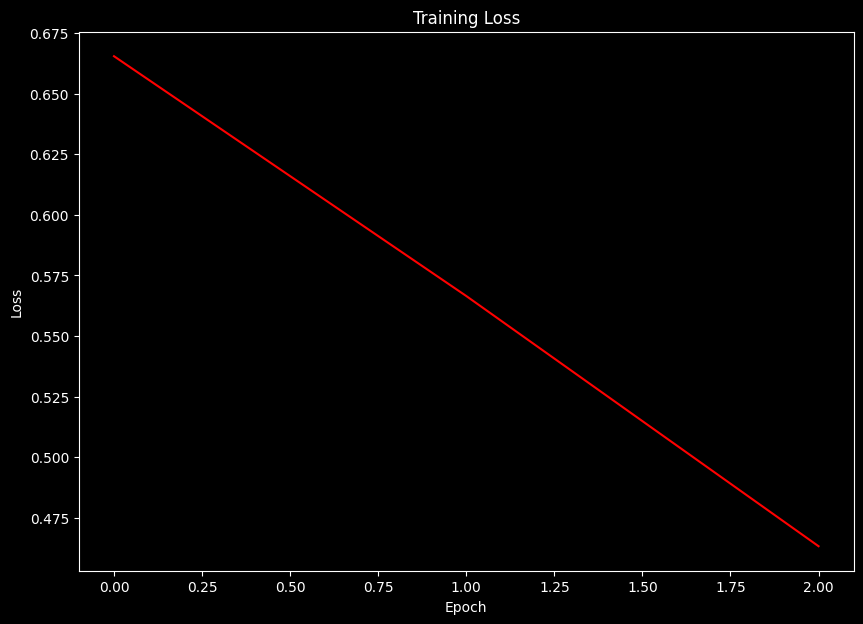

In [335]:

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Loss', title="Training Loss")

# plt.plot([x for x in range(epochs)], losses, 'red')
# plt.plot([x in], losses, 'red')
plt.plot(totalLoss, 'red')
plt.show()


### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [336]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?

### Bronnen

[EuroSAT project](https://github.com/phelber/eurosat)

[Pytorch Neural Nets](https://pytorch.org/docs/stable/nn.html)

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[A simple CNN with Pytorch](https://tomroth.com.au/pytorch-cnn)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[Using Dropout Regularization in PyTorch Models](https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models)